In [2]:
import pandas as pd
import numpy as np
import re

calendarDF =pd.read_csv('calendar (9).csv')

#replacing NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#Extracting prices from the table
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str

calendarDF.head()

,listing_id,date,available,price,Year,Month,Day
0,6513924,2019-01-19,t,55.0,2019,01,19
1,6513924,2019-01-18,t,55.0,2019,01,18
2,6513924,2019-01-17,t,55.0,2019,01,17
3,6513924,2019-01-16,t,55.0,2019,01,16
4,6513924,2019-01-15,t,55.0,2019,01,15


In [3]:
#grouping it on the basis of Year and Month to see the trend of prices
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('year_month_data.csv')
yearDF.head()

,Year,Month,average_Price,year-Month
0,2018,04,240.625729,2018-04
1,2018,05,293.806161,2018-05
2,2018,06,271.845867,2018-06
3,2018,07,284.953570,2018-07
4,2018,08,276.053131,2018-08


Text(0,0.5,'Average Price')

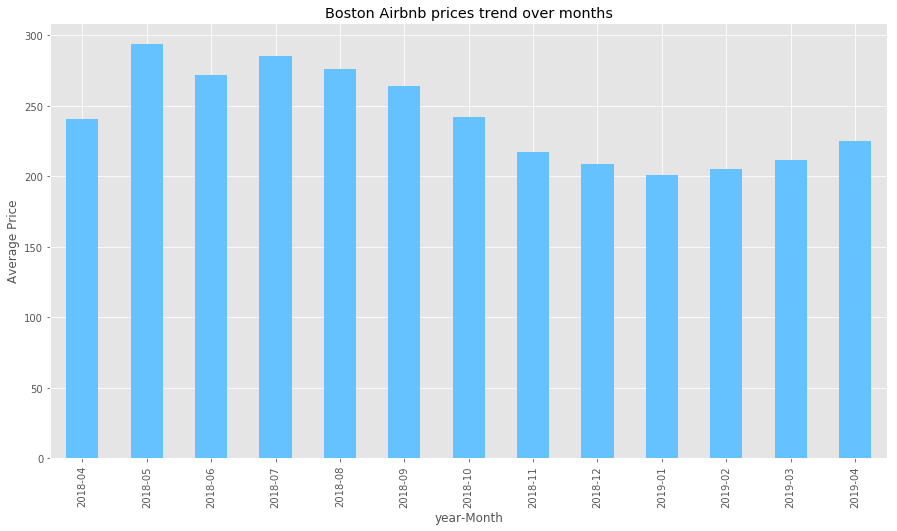

In [4]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')

Extracted name of the day from given date and checked weather it was a holiday and what is the reason for that holiday. Added 3 new columns day_Name, holiday and us_holiday_name which counsits of name of the day, boolean value for "is it a holiday?" and reason for the holiday respectively.

In [5]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

calendarDF.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['us_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarDF.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarDF.set_value(index,'holiday',vall)
    calendarDF.set_value(index,'us_holidays_name',us_holidays.get(sdate))
calendarDF.to_csv('holidays_data.csv')
calendarDF.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
0,6513924,2019-01-19,t,55.0,2019,01,19,Saturday,False,None
1,6513924,2019-01-18,t,55.0,2019,01,18,Friday,False,None
2,6513924,2019-01-17,t,55.0,2019,01,17,Thursday,False,None
3,6513924,2019-01-16,t,55.0,2019,01,16,Wednesday,False,None
4,6513924,2019-01-15,t,55.0,2019,01,15,Tuesday,False,None


In [6]:
#calculating Average price for each day

dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dayDF.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dayDF.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dayDF.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dayDF.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dayDF.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dayDF.set_value(index,'day_num',7)
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel impor

,day_Name,Average_Price,day_num
1,Monday,245.246593,1
5,Tuesday,243.259080,2
6,Wednesday,241.137576,3
4,Thursday,245.254249,4
0,Friday,262.006548,5
2,Saturday,260.994168,6
3,Sunday,247.681384,7


It can be seen that the average price of listings increases on weekends.

In [7]:
#checking which holiday has maximum listings

holidayDF=calendarDF.groupby('us_holidays_name').listing_id.count()
holidayDF=holidayDF.reset_index()
holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
holidayDF

,us_holidays_name,listing_id
2,Independence Day,3385
5,Memorial Day,3318
3,Labor Day,2674
1,Columbus Day,2474
6,New Year's Day,1948
10,Washington's Birthday,1876
9,Veterans Day (Observed),1865
8,Veterans Day,1864
4,"Martin Luther King, Jr. Day",1849
7,Thanksgiving,1841


[Text(0,0.5,'Total Number of Listings'), Text(0.5,0,'US Holidays Name')]

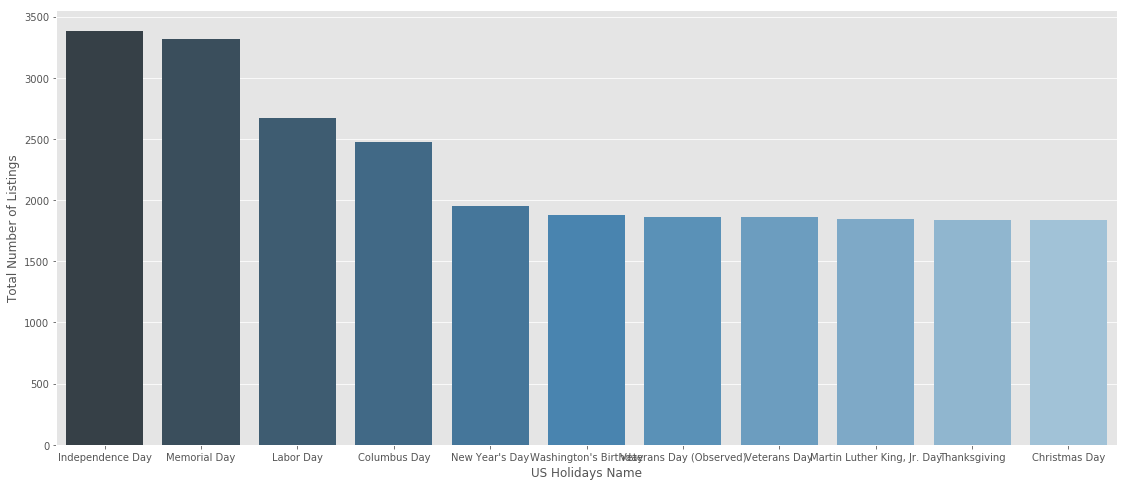

In [8]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')

In [9]:
#which holiday has the maximum average price
holidayPriceDF=calendarDF.groupby('us_holidays_name').price.mean()
holidayPriceDF=holidayPriceDF.reset_index()
holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])

holidayPriceDF.head(10)

,us_holidays_name,price
5,Memorial Day,279.319168
2,Independence Day,275.053176
3,Labor Day,267.415482
1,Columbus Day,229.414309
7,Thanksgiving,213.687127
8,Veterans Day,213.326717
9,Veterans Day (Observed),210.609651
0,Christmas Day,209.450136
6,New Year's Day,206.532854
10,Washington's Birthday,202.841684


[Text(0,0.5,'Average Price'), Text(0.5,0,'US Holidays Name')]

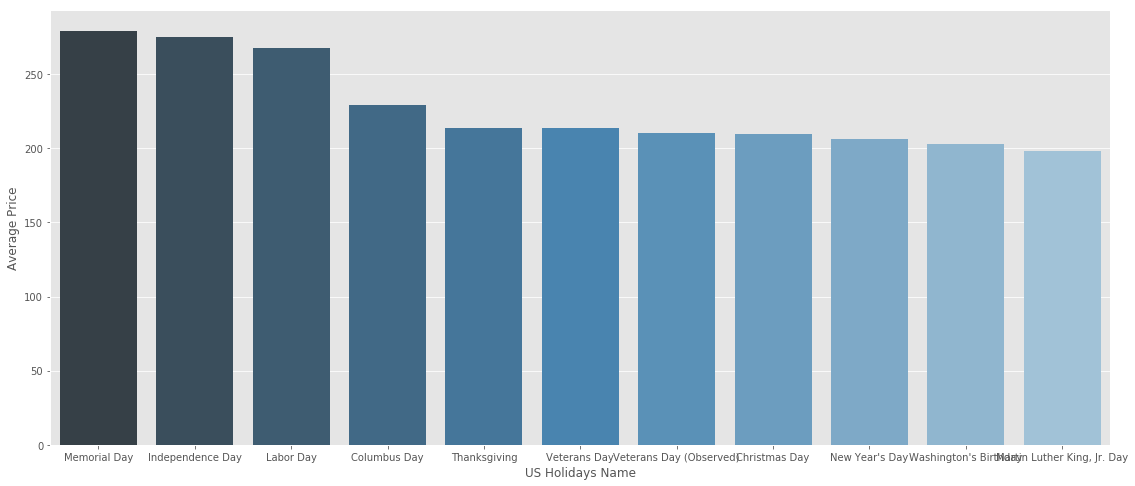

In [10]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [11]:
merger=pd.merge(holidayDF,holidayPriceDF,on='us_holidays_name')
merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
merger=merger.rename(columns={'price':'average_Price'})
merger

,us_holidays_name,number_Of_Listings,average_Price
0,Independence Day,3385,275.053176
1,Memorial Day,3318,279.319168
2,Labor Day,2674,267.415482
3,Columbus Day,2474,229.414309
4,New Year's Day,1948,206.532854
5,Washington's Birthday,1876,202.841684
6,Veterans Day (Observed),1865,210.609651
7,Veterans Day,1864,213.326717
8,"Martin Luther King, Jr. Day",1849,197.903732
9,Thanksgiving,1841,213.687127


In [20]:
#analyzing data of september and october

checkHolidaysDF=calendarDF[(calendarDF['Year'] == '2018') & ((calendarDF['Month'] == '05')|(calendarDF['Month'] == '07') )]
checkHolidaysDF=checkHolidaysDF.groupby(['Year','Month','holiday']).price.mean()
checkHolidaysDF=checkHolidaysDF.reset_index()
#checkHolidaysDF.head()

In [21]:
#analyzing longweekednd holiday days

columbusDF=calendarDF[(calendarDF['Year'] == '2018') & (calendarDF['Month'] == '05' ) & ((calendarDF['Day'] == '26') | (calendarDF['Day'] == '27') | (calendarDF['Day'] == '28'))]
columbusDF.groupby('Month').price.mean()

Month
05    301.757387
Name: price, dtype: float64

In [22]:
#analyzing rest of the days

NocolumbusDF=calendarDF[(calendarDF['Year'] == '2018') & (calendarDF['Month'] == '05' ) & ((calendarDF['Day'] != '26') | (calendarDF['Day'] != '27') | (calendarDF['Day'] != '28'))]
NocolumbusDF.groupby('Month').price.mean()

Month
05    293.806161
Name: price, dtype: float64

It can be analyzed that on a long weekend the average price is 301.76 while for the whole month the average price was 293.81. Hence, this suggests that the price of listings increses with the presence of long weekend.

In [25]:
# analyzing data from date 19th of November to date 28th of November which includes both long weekend and normal workdays

octDF=calendarDF[(calendarDF['Year'] == '2018') & (calendarDF['Month'] == '11' )& ((calendarDF['Day'] == '19' )| (calendarDF['Day'] == '20' )| (calendarDF['Day'] == '21' )| (calendarDF['Day'] == '22' )| (calendarDF['Day'] == '23' )| (calendarDF['Day'] == '24' )| (calendarDF['Day'] == '25' )| (calendarDF['Day'] == '26' )| (calendarDF['Day'] == '27' )| (calendarDF['Day'] == '28' ))]
octDF=octDF.groupby('Day').price.mean()
octDF=octDF.reset_index()
octDF=octDF.sort_values('Day',ascending=[1])
octDF=octDF.rename(columns={'price':'Average_Price'})
octDF.head(10)

,Day,Average_Price
0,19,209.681672
1,20,209.622115
2,21,209.999460
3,22,213.687127
4,23,225.827642
5,24,222.924365
6,25,215.386853
7,26,211.811087
8,27,211.216578
9,28,211.315874


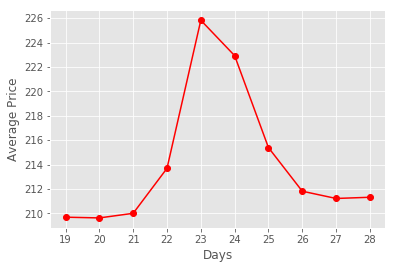

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x=octDF['Day'].tolist()
y=octDF['Average_Price'].tolist()

plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()